In [880]:
# Import Libraries

# data manipulation and analysis
import pandas as pd

# multi-dimensional arrays and matrices
# mathematical functions
import numpy as np

# parsing & processing Python Source Code
# convert strings of Python code into executable code
import ast # Abstract Syntax Trees (AST) module

# data visualization
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations
import seaborn as sns # interface for drawing & statistical graphics
import mplcursors # interactive data cursors
import plotly.express as px

# database adapter for Python
import psycopg2 # allows interaction with PostgreSQL
import pandas as pd

# probability distributions and statistical functions
from scipy.stats import norm 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [881]:
# Read uncleaned disney_movies.csv file
df_2 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\QA\Data\Cleaned\Python\df_2.csv', index_col=False, sep=',')

In [882]:
df_2

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940film),01:28,1940-02-07,164000000
1,Fantasia (1940film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [883]:
df_2.columns

Index(['movie_name', 'Running time (min)', 'Release date', 'Box office'], dtype='object')

In [884]:
# Define a function to process the movie names
def process_movie_name(name):
    import re
    # Regular expression to match sequences of 4 numbers followed by alpha characters
    pattern = r'(\d{4})([a-zA-Z]+)'
    # Check if the name contains parentheses
    if '(' in name and ')' in name:
        # If it does, apply the regular expression to the part inside the parentheses
        name = re.sub(pattern, r'\1 \2', name)
    return name

# Apply the function to the movie_name column
df_2['movie_name'] = df_2['movie_name'].apply(process_movie_name)

# Display the updated DataFrame
df_2

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [885]:
df_2.to_csv('df_3.csv', index=False, sep=',', encoding='utf-8')

In [886]:
# Read uncleaned disney_movies.csv file
df_3 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\QA\Data\Cleaned\Python\df_3.csv', index_col=False, sep=',')

# df_3

## Data Exploration

In [887]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          371 non-null    object 
 1   Running time (min)  369 non-null    object 
 2   Release date        371 non-null    object 
 3   Box office          269 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.7+ KB


In [888]:
df_3.shape

(371, 4)

In [889]:
df_3.describe()

,Box office
count,269
mean,1935761693
std,30481216357
min,0
25%,5100000
50%,22900000
75%,72200000
max,500000302000


In [890]:
df_3['Box office']

0     164000000
1      76400000
2        960000
3       1300000
4     267399999
         ...   
366         NaN
367         NaN
368         NaN
369         NaN
370         NaN
Name: Box office, Length: 371, dtype: float64

In [891]:
# Describe the DataFrame with floating-point precision
df_3_description = df_3.describe()

# Display the summary statistics with float format
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(df_3_description)

           Box office
count          269.00
mean    1935761693.45
std    30481216357.08
min              0.16
25%        5100000.00
50%       22900000.00
75%       72200000.00
max   500000302000.00


In [892]:
df_3.isnull().sum()

movie_name              0
Running time (min)      2
Release date            0
Box office            102
dtype: int64

Box office contains 102 null values

## Data Cleaning

### Handling Missing Values

In [893]:
# df_3.drop(na)

# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

# Drop rows with missing values
df_3_cleaned = df_3.dropna()

# Checking if there are still missing values after dropping
print(df_3_cleaned.isnull().sum())

movie_name            0
Running time (min)    0
Release date          0
Box office            0
dtype: int64


In [894]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [895]:
# df_3.fillna()

# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

# Fill missing values in 'Running time (min)' with the mean value of the column
df_3['Box office'].fillna(df_3['Box office'].mean(), inplace=True)

# Fill missing values in 'Box office' with 0
df_3['Box office'].fillna(0, inplace=True)

In [896]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


### Remove Duplicates

In [897]:
# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

In [898]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [899]:
# Convert 'Box office' column to float data type
df_3['Box office'] = df_3['Box office'].astype(float)

# Round the values to remove decimal places
df_3['Box office'] = df_3['Box office'].round(0)

# Display the DataFrame to verify changes
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [900]:
# Set display options to show full float values without scientific notation
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

# Display the DataFrame to see the updated representation
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [901]:
# Find rows with empty values
empty_rows = df_3[df_3.isnull().any(axis=1)]

# Display the rows with empty values
print(empty_rows)

                 movie_name Running time (min) Release date  Box office
310    Anaganaga O Dheerudu                NaN   2011-01-14  1935761693
340  Ghost of the Mountains                NaN   2017-06-30  1935761693


In [902]:
df_3.to_csv('df_3.csv', index=False, sep=',', encoding='utf-8')

In [903]:
# Read uncleaned disney_movies.csv file
df_3 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\QA\Data\Cleaned\Python\df_3.csv', index_col=False, sep=',')

In [904]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


## Visualization libraries

### Matplotlib

In [905]:
df_3.columns

Index(['movie_name', 'Running time (min)', 'Release date', 'Box office'], dtype='object')

In [906]:
df_3.dtypes

movie_name             object
Running time (min)     object
Release date           object
Box office            float64
dtype: object

#### Line Plot of Total Box office Earnings per Decade

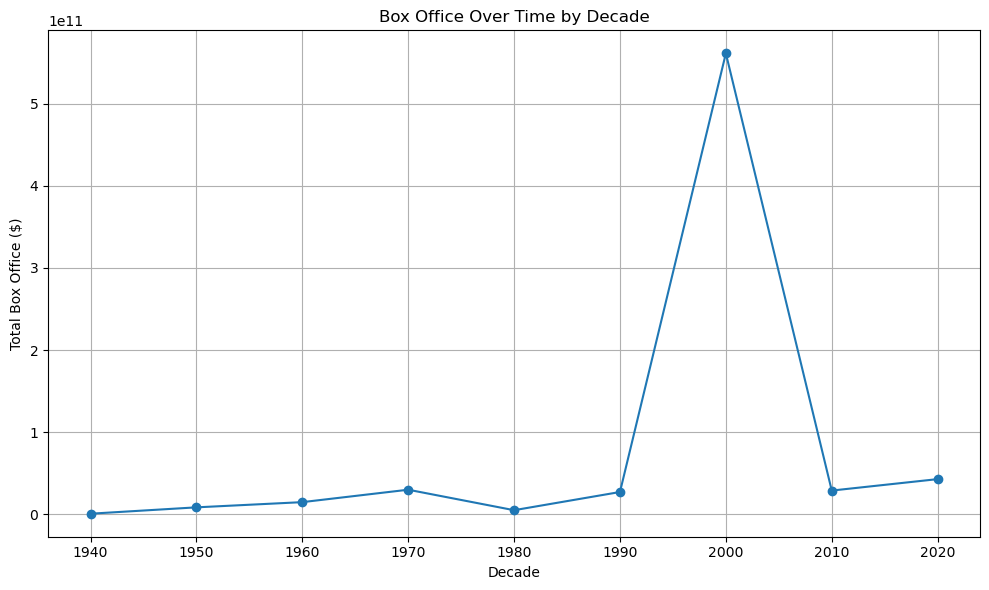

In [907]:
df_3['Release date'] = pd.to_datetime(df_3['Release date'])

# Round release date to decade
df_3['Decade'] = (df_3['Release date'].dt.year // 10) * 10

# Group by decade and sum box office revenues
df_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_decade['Decade'], df_decade['Box office'], marker='o', linestyle='-')
plt.title('Box Office Over Time by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

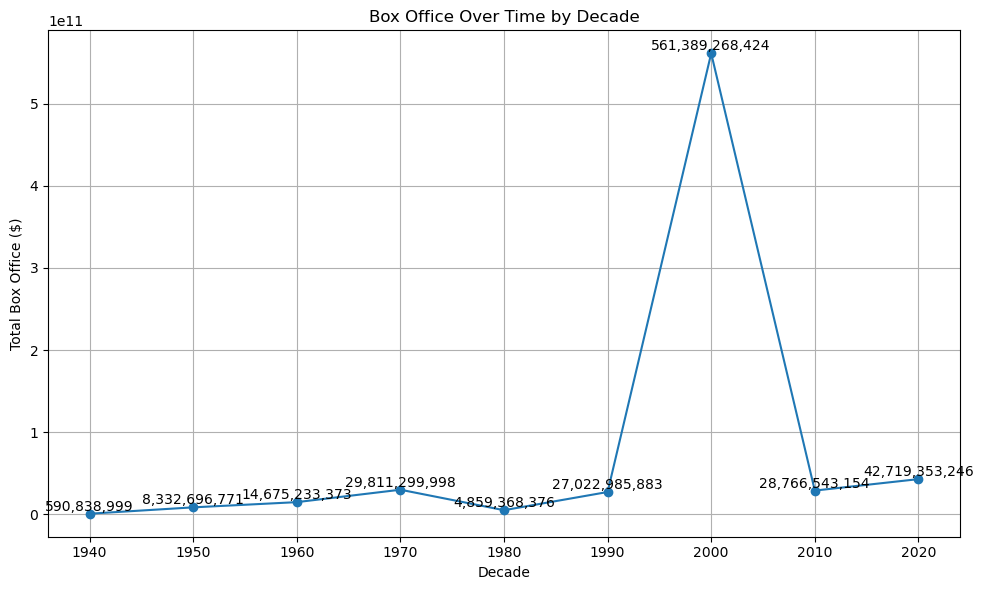

In [908]:
# Round release date to decade
df_3['Decade'] = (df_3['Release date'].dt.year // 10) * 10

# Group by decade and sum box office revenues
df_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_decade['Decade'], df_decade['Box office'], marker='o', linestyle='-')
plt.title('Box Office Over Time by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)

# Annotate each point with its corresponding value
for x, y in zip(df_decade['Decade'], df_decade['Box office']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [909]:
df_3['Box office']

0      164000000
1       76400000
2         960000
3        1300000
4      267399999
         ...    
366   1935761693
367   1935761693
368   1935761693
369   1935761693
370   1935761693
Name: Box office, Length: 371, dtype: float64

In [910]:
# Find minimum and maximum box office values
min_box_office = df_3['Box office'].min()
max_box_office = df_3['Box office'].max()

print("Minimum Box Office:", min_box_office)
print("Maximum Box Office:", max_box_office)

Minimum Box Office: 0.0
Maximum Box Office: 500000302000.0


In [911]:
# Find the row with the maximum box office value
max_box_office_index = df_3['Box office'].idxmax()
max_box_office_row = df_3.loc[max_box_office_index]

print(f'The row with the maximum box office value is:\n{max_box_office_row}')

The row with the maximum box office value is:
movie_name            Whispers An Elephants Tale
Running time (min)                         01:12
Release date                 2000-03-10 00:00:00
Box office                          500000302000
Decade                                      2000
Name: 218, dtype: object


#### Scatter Plot Relationship between total box office earnings and count of release dates by decade

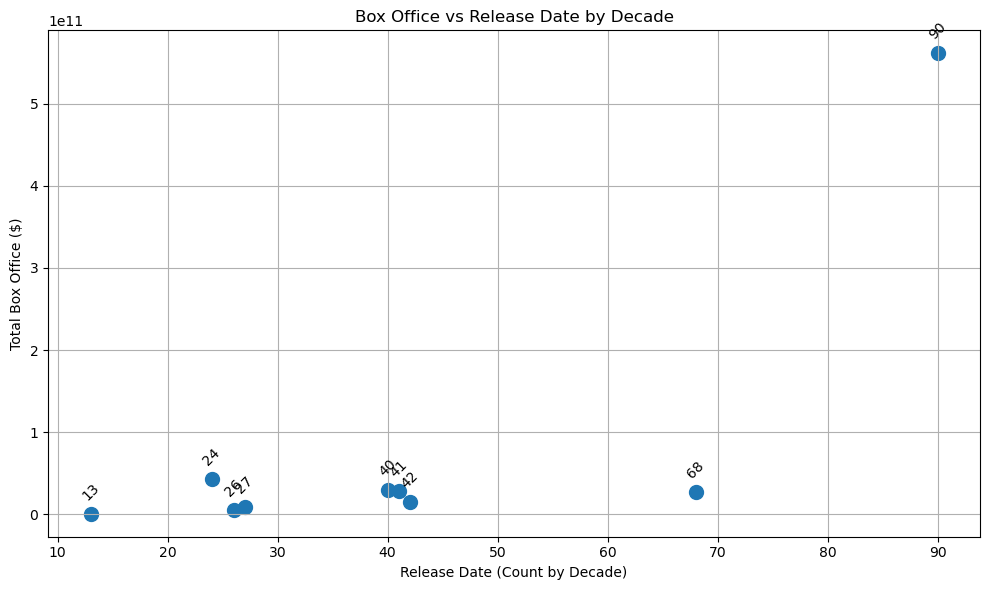

In [912]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_decade_release_date['Release date'], df_decade_box_office['Box office'], s=100)

# Annotate each point with its corresponding value
for i, txt in enumerate(df_decade_release_date['Release date']):
    plt.annotate(txt, (df_decade_release_date['Release date'][i], df_decade_box_office['Box office'][i]), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)

plt.title('Box Office vs Release Date by Decade')
plt.xlabel('Release Date (Count by Decade)')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [913]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Histogram of Total Box Office Earnings per Decade

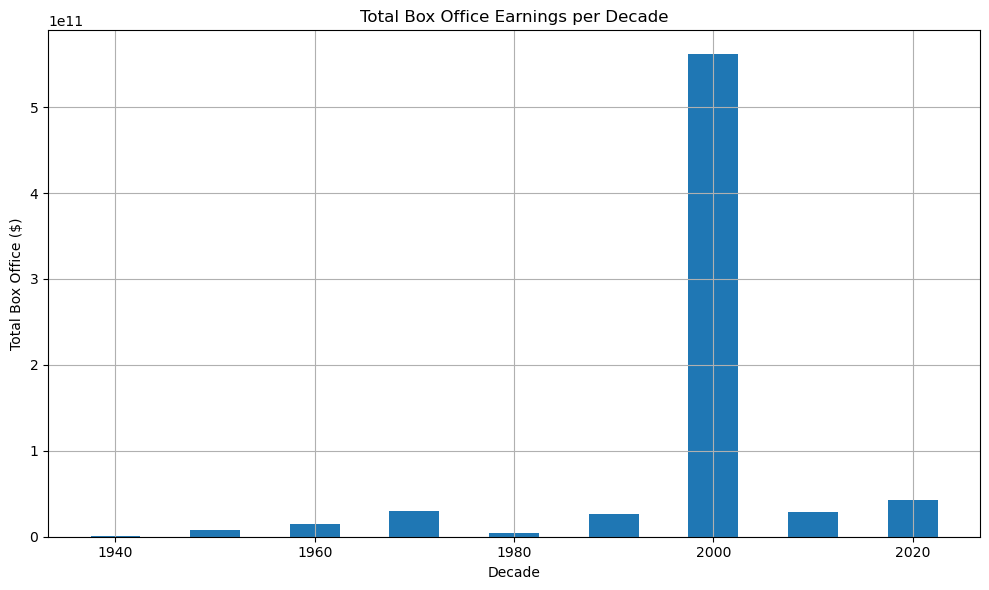

In [914]:
# Grouping the DataFrame by decade and summing up the box office earnings for each decade
total_box_office_per_decade = df_3.groupby('Decade')['Box office'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(total_box_office_per_decade.index, total_box_office_per_decade, width=5)

plt.title('Total Box Office Earnings per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [915]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Pie Chart of Box Office Earnings

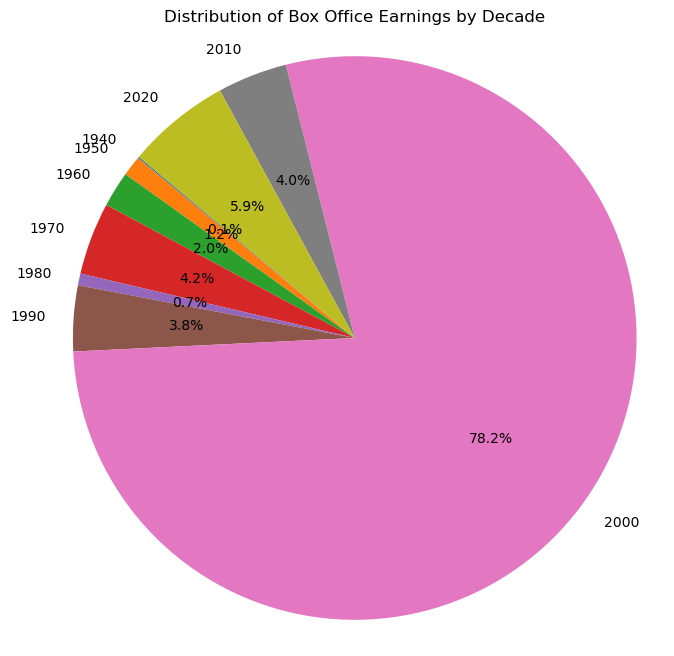

In [916]:
# Summing up the box office earnings for each decade
total_box_office_per_decade = df_3.groupby('Decade')['Box office'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(total_box_office_per_decade, labels=total_box_office_per_decade.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Box Office Earnings by Decade')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [917]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


### Seaborn

#### Boxplot displaying distribution of box office earnings per decade
- detect outliers

<Axes: xlabel='Decade', ylabel='Box office'>

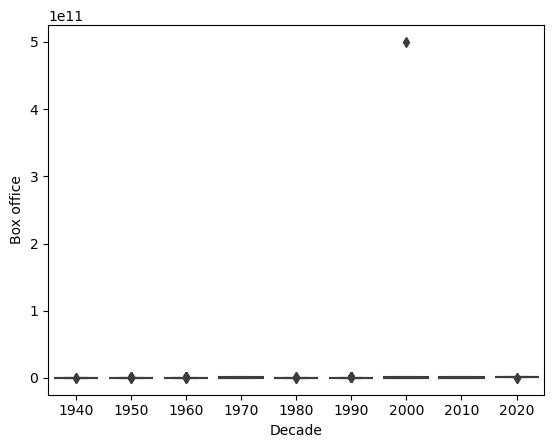

In [918]:
sns.boxplot(x='Decade', y='Box office', data=df_3)

In [919]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Count Plot of movies releaseed in each decade

<Axes: xlabel='Decade', ylabel='count'>

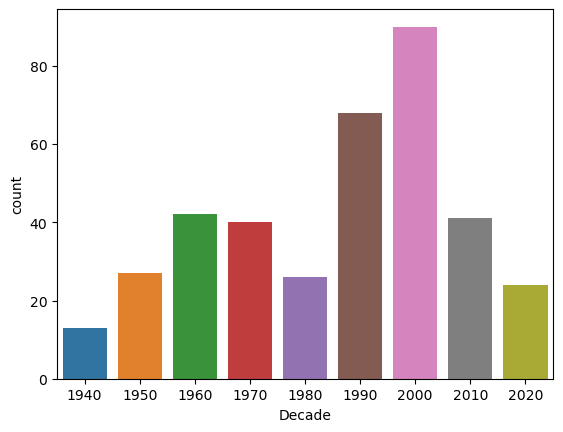

In [920]:
sns.countplot(x='Decade', data=df_3)

In [921]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


### Plotly

#### Area Chart of Total Box Office Revenue per decade

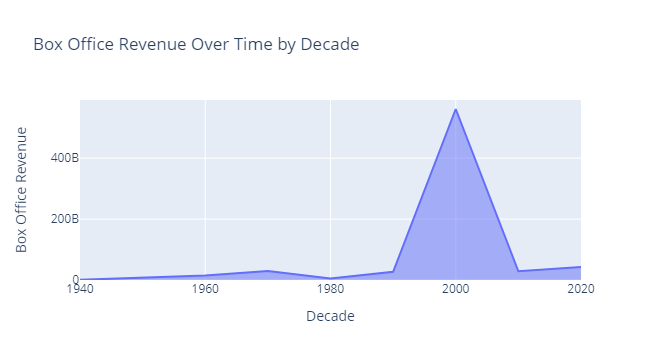

In [932]:
# Convert 'Release date' to datetime if not already
df_3['Release date'] = pd.to_datetime(df_3['Release date'])

# Group by decade and sum the box office revenue
df_box_office_by_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Create the Area Chart
fig = px.area(df_box_office_by_decade, x='Decade', y='Box office', title='Box Office Revenue Over Time by Decade',
              labels={'Decade': 'Decade', 'Box office': 'Box Office Revenue'}, 
              hover_data={'Decade': False, 'Box office': True})

# Show the plot
fig.show()

In [933]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


#### Violin Plot of distribution of box office earnings for each decade

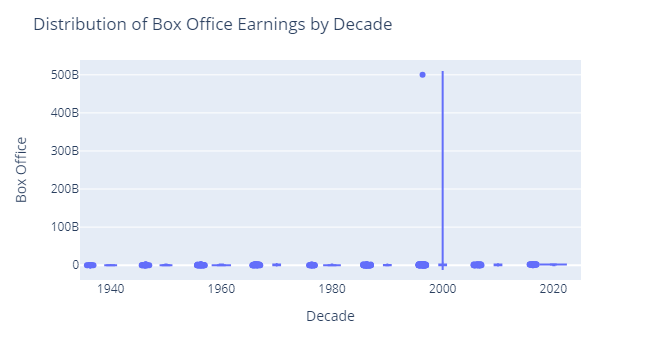

In [934]:
# Assuming df_3 is your DataFrame
fig = px.violin(df_3, x='Decade', y='Box office', box=True, points="all")

# Customize the layout if needed
fig.update_layout(title='Distribution of Box Office Earnings by Decade',
                  xaxis_title='Decade',
                  yaxis_title='Box Office',
                  )

# Show the plot
fig.show()

In [935]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office,Decade
0,Pinocchio (1940 film),01:28,1940-02-07,164000000,1940


### Z-Score

### IQR

## Statistical Analysis

### Descriptive Statistics

In [923]:
df_3.describe()

,Release date,Box office,Decade
count,371,371,371
mean,1990-06-05 03:17:57.088948736,1935761693,1986
min,1940-02-07 00:00:00,0,1940
25%,1972-11-19 12:00:00,11000000,1970
50%,1996-03-08 00:00:00,52900000,1990
75%,2006-03-27 12:00:00,1935761693,2000
max,2023-11-17 00:00:00,500000302000,2020
std,NaN,25941723648,22


#### Correlation analysis

In [924]:
df_3.corr()

ValueError: could not convert string to float: 'Pinocchio (1940 film)'

#### Hypothesis testing

In [925]:
scipy.stats

NameError: name 'scipy' is not defined

In [926]:
t-tests

NameError: name 't' is not defined

In [927]:
ANOVA

NameError: name 'ANOVA' is not defined

#### Regression analysis

In [928]:
statsmodels

NameError: name 'statsmodels' is not defined

In [929]:
scikit-learn

NameError: name 'scikit' is not defined